# Comparing COMPAS-1x and COMPAS-2x
This notebook compares the COMPAS-1 and COMPAS-2 datasets. It is used to highlight the major differences between both datasets.

COMPAS-1 is comprehend solely of PAHs made of cata-condensed benzene rings, while COMPAS-2 contains hPAHs made of cata-condensed benzene and 9 heterocyclic and cyclobutadiene. The heterocyclic rings are made of 5 and 6-membered rings containing one or two heteroatoms (N, O, S, and B).

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from pathlib import Path

# Reload imported libraries automatically
%load_ext autoreload
%autoreload 2

In [2]:
# Import data
df_compas_1 = pd.read_csv('.temp/data/compas-1x.csv', index_col=0)
df_compas_2 = pd.read_csv(".temp/data/compas-2x.csv", index_col=0).query('charge == 0').copy()

In [4]:
# Print shape of data
print("COMPAS-1:", df_compas_1.shape)
print("COMPAS-2:", df_compas_2.shape)

# Print column names
print("COMPAS-2 not in COMPAS-1:", set(df_compas_2.columns) - set(df_compas_1.columns))

COMPAS-1: (33944, 33)
COMPAS-2: (524392, 45)
COMPAS-2 not in COMPAS-1: {'zero_point_energy', 'benzene', 'thiophene', 'furan', 'dhdiborinine', 'borinine', 'borole', 'pyridine', 'cyclobutadiene', 'pyrazine', '14diborinine', 'pyrrole'}


# Compare COMPAS-1 and COMPAS-2 results for the same molecule

Some molecules from COMPAS-1 are also part of the COMPAS-2 dataset. It is important to note that these molecules emerge as part of the combinatorial enumeration process of COMPAS-2 and therefore follow the same statistical distribution. We can compare the results for these molecules.

In [61]:
from func import calc_atomisation_energy

df_compas_1['dataset'] = 'compas-1'
df_compas_2['dataset'] = 'compas-2'
df = pd.concat([df_compas_1, df_compas_2], axis=0)
df = df.sort_values('smiles')

inchi_common = set(df_compas_1.inchi).intersection(set(df_compas_2.inchi))


df['ae'] = calc_atomisation_energy(df)
benchmark = df.query('inchi in @inchi_common')

In [36]:
# electronic properties
props = ['homo','lumo','gap','aip','aea',
        #  'ae'
         ]
props_corr = ['homo_corr','lumo_corr','gap_corr','aip_corr','aea_corr']
# group by
hue_by = ['rings', 'aromatic_rings', 'atoms', 'heteroatoms', 'heterocycles',
       'branch', 'cyclobutadiene', 'pyrrole', 'borole', 'furan', 'thiophene',
       'dhdiborinine', '14diborinine', 'pyrazine', 'pyridine', 'borinine',
       'benzene', 'h', 'c', 'b', 's', 'o', 'n']

In [12]:
from colors import cmap, heterocycles_colors
from matplotlib import pyplot as plt
import seaborn as sns

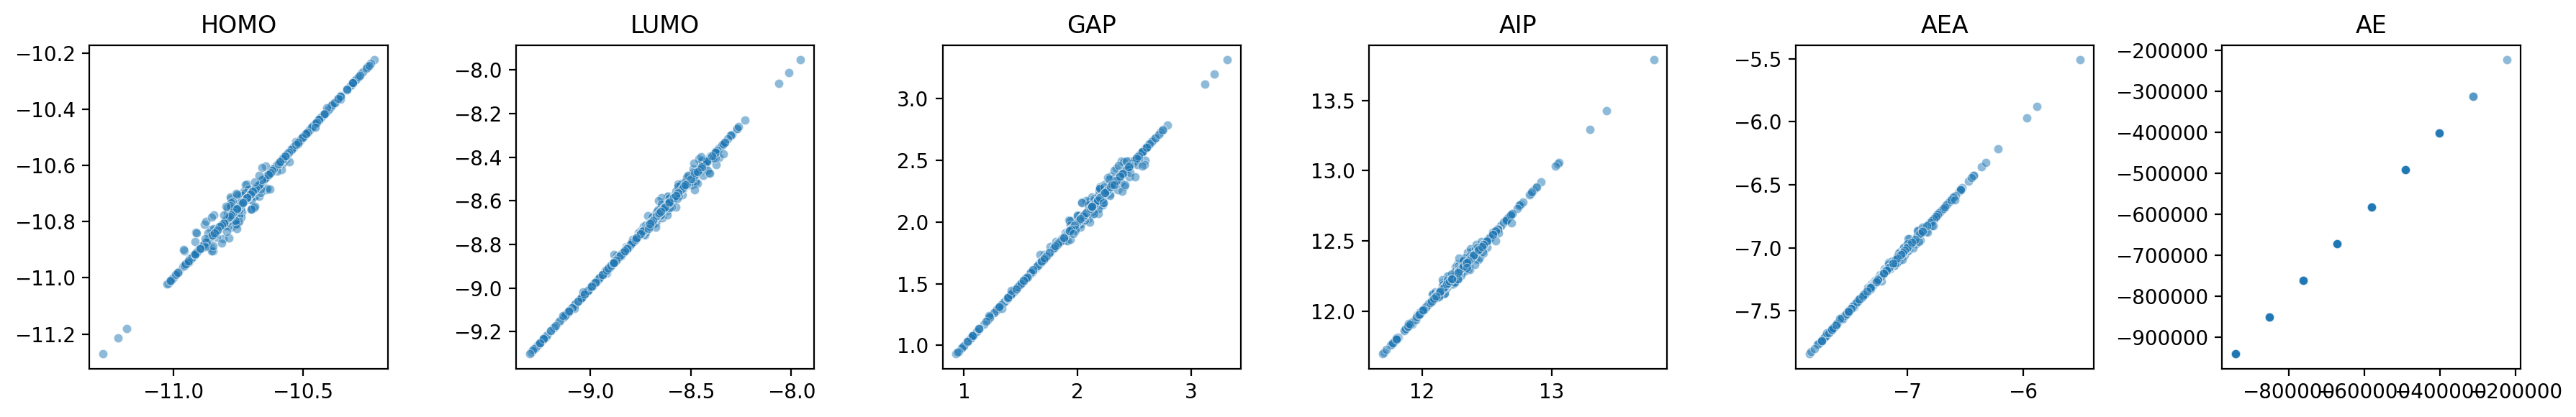

In [63]:
n_rows = 1
n_cols = int(np.ceil(len(props) / n_rows))

fig, axs = plt.subplots(n_rows,n_cols,figsize=(n_cols*3,n_rows*3), dpi=200)
# Plot AIPs for COMPAS-1 and COMPAS-2
for prop, ax in zip(props, axs):
    sns.scatterplot(x=benchmark.query('dataset == "compas-1"')[prop].values,
                y=benchmark.query('dataset == "compas-2"')[prop].values,
                alpha=0.5, s=20, ax=ax)
    ax.set_title(prop.upper())
# plt.xlabel('COMPAS-1')
# plt.ylabel('COMPAS-2')
plt.tight_layout()